In [176]:
# prompt: git clone

!git pull https://github.com/saadrza/HPC_uni_tn_2025.git

remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 11 (delta 6), reused 11 (delta 6), pack-reused 0 (from 0)
Unpacking objects: 100% (11/11), 890 bytes | 296.00 KiB/s, done.
From https://github.com/saadrza/HPC_uni_tn_2025
 * branch            HEAD       -> FETCH_HEAD
Updating 133ddd9..959d879
Fast-forward
 .../parallel_hybrid/logs/openmpi/4096/matmul_openmpi_4096_8_output.log  | 2 +-
 .../parallel_hybrid/src/scripts/4096/matmul_openmp_job.e3311252         | 0
 .../parallel_hybrid/src/scripts/4096/matmul_openmp_job.o3311252         | 1 +
 3 files changed, 2 insertions(+), 1 deletion(-)
 create mode 100644 HPC_uni_tn_2025/parallel_hybrid/src/scripts/4096/matmul_openmp_job.e3311252
 create mode 100644 HPC_uni_tn_2025/parallel_hybrid/src/scripts/4096/matmul_openmp_job.o3311252


In [177]:
# prompt: se path to

import os
os.chdir('/content/HPC_uni_tn_2025/HPC_uni_tn_2025')

In [178]:
import os
import pandas as pd  # Import pandas for table representation
import re
matrix_sizes = [1024, 2048, 4096, 8192]

In [179]:
# Define the subfolders
subfolders = ['parallel_mpi/logs'
              #, 'parallel_openmpi/logs', 'serial_mpi/logs'
              ]

# Initialize a dictionary to store logs from each folder
logs = {}

# Initialize a list to store extracted data
extracted_data = []

# Iterate through each subfolder and read log files
for folder in subfolders:
    logs[folder] = []
    for root, _, files in os.walk(folder):
        for file in files:
            if file.endswith('output.log'):  # Check if the file is a log file
                file_path = os.path.join(root, file)

                with open(file_path, 'r') as f:
                    log_content = f.read()  # Read the entire content of the log file
                    logs[folder].append(log_content)

                # Extract matrix size and core number from the file name
                tokens = file.split('_')
                if len(tokens) >= 5:
                    matrix_size = tokens[3]  # Fourth part is matrix size
                    core_number = tokens[4]  # Fifth part is core number
                    extracted_data.append({
                        'Folder': folder,
                        'Log File': file,
                        'Matrix Size': matrix_size,
                        'Core Number': core_number,
                        'Log': log_content  # Add the log content as the last column
                    })

# Convert the extracted data into a DataFrame
extracted_data_df_mpi = pd.DataFrame(extracted_data)
extracted_data_df_mpi['Seconds']=extracted_data_df_mpi['Log'].apply(lambda log: float(re.search(r'took ([\d.]+) seconds', log).group(1)) if re.search(r'took ([\d.]+) seconds', log) else None)


In [180]:
# Convert 'Seconds' to numeric, coercing errors to NaN
extracted_data_df_mpi['Seconds'] = pd.to_numeric(extracted_data_df_mpi['Seconds'], errors='coerce')

# drop rows where 'Seconds' is NaN
extracted_data_df_mpi.dropna(subset=['Seconds'], inplace=True)

# Display the DataFrame
# Convert 'Core Number' and 'Matrix Size' columns to integers for sorting
extracted_data_df_mpi['Core Number'] = extracted_data_df_mpi['Core Number'].astype(int)
extracted_data_df_mpi['Matrix Size'] = extracted_data_df_mpi['Matrix Size'].astype(int)
#extracted_data_df_mpi = extracted_data_df_mpi[extracted_data_df_mpi['Matrix Size'].isin(matrix_sizes)]

# Sort the DataFrame by 'Matrix Size' and 'Core Number'
extracted_data_df_mpi.sort_values(by=['Matrix Size', 'Core Number'], inplace=True)
extracted_data_df_mpi

,Folder,Log File,Matrix Size,Core Number,Log,Seconds
11,parallel_mpi/logs,matmul_parallel_mpi_1024_1_output.log,1024,1,MPI 1024x1024 matrix multiplication took 3.245...,3.245984
8,parallel_mpi/logs,matmul_parallel_mpi_1024_2_output.log,1024,2,MPI 1024x1024 matrix multiplication (outer-pro...,0.366013
10,parallel_mpi/logs,matmul_parallel_mpi_1024_4_output.log,1024,4,MPI 1024x1024 matrix multiplication (outer-pro...,0.152596
6,parallel_mpi/logs,matmul_parallel_mpi_1024_8_output.log,1024,8,MPI 1024x1024 matrix multiplication (outer-pro...,0.089881
9,parallel_mpi/logs,matmul_parallel_mpi_1024_16_output.log,1024,16,MPI 1024x1024 matrix multiplication (outer-pro...,0.034705
7,parallel_mpi/logs,matmul_parallel_mpi_1024_32_output.log,1024,32,MPI 1024x1024 matrix multiplication (outer-pro...,0.019814
15,parallel_mpi/logs,matmul_parallel_mpi_2048_1_output.log,2048,1,MPI 2048x2048 matrix multiplication (outer-pro...,22.660982
13,parallel_mpi/logs,matmul_parallel_mpi_2048_2_output.log,2048,2,MPI 2048x2048 matrix multiplication (outer-pro...,4.385251
17,parallel_mpi/logs,matmul_parallel_mpi_2048_4_output.log,2048,4,MPI 2048x2048 matrix multiplication (outer-pro...,1.637735
12,parallel_mpi/logs,matmul_parallel_mpi_2048_8_output.log,2048,8,MPI 2048x2048 matrix multiplication (outer-pro...,0.718649


In [181]:
import os
import pandas as pd  # Import pandas for table representation

# Define the subfolders
subfolders = [#'parallel_mpi/logs'
              'parallel_openmpi/logs'
              #'serial_mpi/logs'
              ]

# Initialize a dictionary to store logs from each folder
logs = {}

# Initialize a list to store extracted data
extracted_data = []

# Iterate through each subfolder and read log files
for folder in subfolders:
    logs[folder] = []
    for root, _, files in os.walk(folder):
        for file in files:
            if file.endswith('output.log'):  # Check if the file is a log file
                file_path = os.path.join(root, file)

                with open(file_path, 'r') as f:
                    log_content = f.read()  # Read the entire content of the log file
                    logs[folder].append(log_content)

                # Extract matrix size and core number from the file name
                tokens = file.split('_')
                if len(tokens) >= 5:
                    matrix_size = tokens[2]  # Fourth part is matrix size
                    core_number = tokens[3]  # Fifth part is core number
                    extracted_data.append({
                        'Folder': folder,
                        'Log File': file,
                        'Matrix Size': matrix_size,
                        'Core Number': core_number,
                        'Log': log_content  # Add the log content as the last column
                    })

# Convert the extracted data into a DataFrame
extracted_data_df_openmpi = pd.DataFrame(extracted_data)
extracted_data_df_openmpi["Seconds"]=extracted_data_df_openmpi['Log'].apply(lambda log: float(re.search(r'took ([\d.]+) seconds', log).group(1)) if re.search(r'took ([\d.]+) seconds', log) else None)


In [182]:
# Convert 'Core Number' and 'Matrix Size' columns to integers for sorting
extracted_data_df_openmpi['Core Number'] = extracted_data_df_openmpi['Core Number'].astype(int)
extracted_data_df_openmpi['Matrix Size'] = extracted_data_df_openmpi['Matrix Size'].astype(int)
#change matrix size 8196 with 8192
extracted_data_df_openmpi.loc[extracted_data_df_openmpi['Matrix Size'] == 8196, 'Matrix Size'] = 8192
# Convert 'Seconds' to numeric, coercing errors to NaN
extracted_data_df_openmpi['Seconds'] = pd.to_numeric(extracted_data_df_openmpi['Seconds'], errors='coerce')
# Drop rows where 'Seconds' is NaN
extracted_data_df_openmpi.dropna(subset=['Seconds'], inplace=True)
extracted_data_df_openmpi = extracted_data_df_openmpi[extracted_data_df_openmpi['Matrix Size'].isin(matrix_sizes)]
# Sort the DataFrame by 'Matrix Size' and 'Core Number'
extracted_data_df_openmpi.sort_values(by=['Matrix Size', 'Core Number'], inplace=True)

# Display the DataFrame
extracted_data_df_openmpi

,Folder,Log File,Matrix Size,Core Number,Log,Seconds
17,parallel_openmpi/logs,matmul_openmpi_1024_1_output.log,1024,1,OpenMP outer‐product matmul: N = 1024 (allocat...,0.727298
15,parallel_openmpi/logs,matmul_openmpi_1024_2_output.log,1024,2,OpenMP outer‐product matmul: N = 1024 (allocat...,0.679617
16,parallel_openmpi/logs,matmul_openmpi_1024_4_output.log,1024,4,OpenMP outer‐product matmul: N = 1024 (allocat...,0.706506
13,parallel_openmpi/logs,matmul_openmpi_1024_8_output.log,1024,8,OpenMP outer‐product matmul: N = 1024 (allocat...,0.723567
14,parallel_openmpi/logs,matmul_openmpi_1024_16_output.log,1024,16,OpenMP outer‐product matmul: N = 1024 (allocat...,0.669052
18,parallel_openmpi/logs,matmul_openmpi_1024_32_output.log,1024,32,OpenMP outer‐product matmul: N = 1024 (allocat...,0.680650
21,parallel_openmpi/logs,matmul_openmpi_2048_1_output.log,2048,1,OpenMP outer‐product matmul: N = 2048 (allocat...,8.424309
23,parallel_openmpi/logs,matmul_openmpi_2048_2_output.log,2048,2,OpenMP outer‐product matmul: N = 2048 (allocat...,7.269258
20,parallel_openmpi/logs,matmul_openmpi_2048_4_output.log,2048,4,OpenMP outer‐product matmul: N = 2048 (allocat...,7.667556
22,parallel_openmpi/logs,matmul_openmpi_2048_8_output.log,2048,8,OpenMP outer‐product matmul: N = 2048 (allocat...,7.230903


In [183]:
import os
import pandas as pd  # Import pandas for table representation

# Define the subfolders
subfolders = [#'parallel_mpi/logs'
              #'parallel_openmpi/logs'
              'serial_mpi/logs'
              ]

def extract_data_from_serial_logs(subfolders):
    """
    Extracts data from serial log files in the specified subfolders.
    Args:

        subfolders (list): List of subfolder paths containing log files.
    Returns:
        pd.DataFrame: DataFrame containing extracted data with columns for folder, log file, matrix size, core number, and log content.
    """
    # Initialize a dictionary to store logs from each folder
    logs = {}

    # Initialize a list to store extracted data
    extracted_data = []

    # Iterate through each subfolder and read log files
    for folder in subfolders:
        logs[folder] = []
        for root, _, files in os.walk(folder):
            for file in files:
                if file.endswith('output.log'):  # Check if the file is a log file
                    file_path = os.path.join(root, file)

                    with open(file_path, 'r') as f:
                        log_content = f.read()  # Read the entire content of the log file
                        logs[folder].append(log_content)

                    # Extract matrix size and core number from the file name
                    tokens = file.split('_')
                    if len(tokens) >= 5:
                        matrix_size = tokens[2]  # Fourth part is matrix size
                        core_number = tokens[3]  # Fifth part is core number
                        extracted_data.append({
                            'Folder': folder,
                            'Log File': file,
                            'Matrix Size': matrix_size,
                            'Core Number': core_number,
                            'Log': log_content  # Add the log content as the last column
                        })

    return pd.DataFrame(extracted_data)

# Extract the data from serial logs
extracted_data_df_serial = extract_data_from_serial_logs(subfolders)


# Convert 'Core Number' and 'Matrix Size' columns to integers for sorting
extracted_data_df_serial['Core Number'] = extracted_data_df_serial['Core Number'].astype(int)
extracted_data_df_serial['Matrix Size'] = extracted_data_df_serial['Matrix Size'].astype(int)
import re
# Extract the time taken from the log content
extracted_data_df_serial['Seconds'] = extracted_data_df_serial['Log'].apply(
    lambda log: float(re.search(r'took ([\d.]+) seconds', log).group(1)) if re.search(r'took ([\d.]+) seconds', log) else None)
# Convert 'Seconds' to numeric, coercing errors to NaN
extracted_data_df_serial['Seconds'] = pd.to_numeric(extracted_data_df_serial['Seconds'], errors='coerce')
# Drop rows where 'Seconds' is NaN
extracted_data_df_serial.dropna(subset=['Seconds'], inplace=True)
# Sort the DataFrame by 'Matrix Size' and 'Core Number'
extracted_data_df_serial.sort_values(by=['Matrix Size', 'Core Number'], inplace=True)

# Display the DataFrame
extracted_data_df_serial

,Folder,Log File,Matrix Size,Core Number,Log,Seconds
1,serial_mpi/logs,matmul_serial_1024_1_output.log,1024,1,Serial matmul (outer): N = 1000 (allocating ~0...,0.449849
2,serial_mpi/logs,matmul_serial_2048_1_output.log,2048,1,Serial matmul (outer): N = 2048 (allocating ~0...,4.974136
0,serial_mpi/logs,matmul_serial_4096_1_output.log,4096,1,Serial matmul (outer): N = 4096 (allocating ~0...,61.600553
3,serial_mpi/logs,matmul_serial_8192_1_output.log,8192,1,Serial matmul (outer): N = 8192 (allocating ~1...,501.753322


In [184]:
import os
import pandas as pd  # Import pandas for table representation
import re

# Define the subfolders
subfolders = ['parallel_hybrid/logs/openmpi']
import pandas as pd  # Import pandas for table representation


# Initialize a dictionary to store logs from each folder
logs = {}

# Initialize a list to store extracted data
extracted_data = []

# Iterate through each subfolder and read log files
for folder in subfolders:
    logs[folder] = []
    for root, _, files in os.walk(folder):
        for file in files:
            if file.endswith('output.log'):  # Check if the file is a log file
                file_path = os.path.join(root, file)

                with open(file_path, 'r') as f:
                    log_content = f.read()  # Read the entire content of the log file
                    logs[folder].append(log_content)

                # Extract matrix size and core number from the file name
                tokens = file.split('_')
                if len(tokens) >= 5:
                    matrix_size = tokens[2]  # Fourth part is matrix size
                    core_number = tokens[3]  # Fifth part is core number
                    extracted_data.append({
                        'Folder': folder,
                        'Log File': file,
                        'Matrix Size': matrix_size,
                        'Core Number': core_number,
                        'Log': log_content  # Add the log content as the last column
                    })

# Extract the data from hybrid logs
extracted_data_df_hybrid = pd.DataFrame(extracted_data)

# Convert 'Core Number' and 'Matrix Size' columns to integers for sorting
extracted_data_df_hybrid['Core Number'] = extracted_data_df_hybrid['Core Number'].astype(int)
extracted_data_df_hybrid['Matrix Size'] = extracted_data_df_hybrid['Matrix Size'].astype(int)
extracted_data_df_hybrid.loc[extracted_data_df_hybrid['Matrix Size'] == 8196, 'Matrix Size'] = 8192

# Extract the time taken from the log content
extracted_data_df_hybrid['Seconds'] = extracted_data_df_hybrid['Log'].apply(
    lambda log: float(re.search(r'took ([\d.]+) seconds', log).group(1)) if re.search(r'took ([\d.]+) seconds', log) else None)

# Convert 'Seconds' to numeric, coercing errors to NaN
extracted_data_df_hybrid['Seconds'] = pd.to_numeric(extracted_data_df_hybrid['Seconds'], errors='coerce')

# Drop rows where 'Seconds' is NaN
extracted_data_df_hybrid.dropna(subset=['Seconds'], inplace=True)
extracted_data_df_hybrid = extracted_data_df_hybrid[extracted_data_df_hybrid['Matrix Size'].isin(matrix_sizes)]
# Sort the DataFrame by 'Matrix Size' and 'Core Number'
extracted_data_df_hybrid.sort_values(by=['Matrix Size', 'Core Number'], inplace=True)

# Display the DataFrame
extracted_data_df_hybrid

,Folder,Log File,Matrix Size,Core Number,Log,Seconds
14,parallel_hybrid/logs/openmpi,matmul_openmpi_1024_1_output.log,1024,1,MPI 1024x1024 matrix multiplication took 3.426...,3.426192
13,parallel_hybrid/logs/openmpi,matmul_openmpi_1024_2_output.log,1024,2,Parallel Hybrid 1024x1024 matrix multiplicatio...,3.426765
11,parallel_hybrid/logs/openmpi,matmul_openmpi_1024_8_output.log,1024,8,Parallel Hybrid 1024x1024 matrix multiplicatio...,4.634656
12,parallel_hybrid/logs/openmpi,matmul_openmpi_1024_16_output.log,1024,16,Parallel Hybrid 1024x1024 matrix multiplicatio...,3.367672
15,parallel_hybrid/logs/openmpi,matmul_openmpi_1024_32_output.log,1024,32,Parallel Hybrid 1024x1024 matrix multiplicatio...,4.797157
17,parallel_hybrid/logs/openmpi,matmul_openmpi_2048_1_output.log,2048,1,Parallel Hybrid 2048x2048 matrix multiplicatio...,92.780655
19,parallel_hybrid/logs/openmpi,matmul_openmpi_2048_2_output.log,2048,2,Parallel Hybrid 2048x2048 matrix multiplicatio...,92.763450
16,parallel_hybrid/logs/openmpi,matmul_openmpi_2048_4_output.log,2048,4,Parallel Hybrid 2048x2048 matrix multiplicatio...,64.907408
18,parallel_hybrid/logs/openmpi,matmul_openmpi_2048_8_output.log,2048,8,Parallel Hybrid 2048x2048 matrix multiplicatio...,88.101465
20,parallel_hybrid/logs/openmpi,matmul_openmpi_2048_16_output.log,2048,16,Parallel Hybrid 2048x2048 matrix multiplicatio...,88.259831


In [185]:
extracted_data_df= pd.concat([extracted_data_df_mpi, extracted_data_df_openmpi, extracted_data_df_serial, extracted_data_df_hybrid], ignore_index=True).dropna()
# Display the combined DataFrame
extracted_data_df

,Folder,Log File,Matrix Size,Core Number,Log,Seconds
0,parallel_mpi/logs,matmul_parallel_mpi_1024_1_output.log,1024,1,MPI 1024x1024 matrix multiplication took 3.245...,3.245984
1,parallel_mpi/logs,matmul_parallel_mpi_1024_2_output.log,1024,2,MPI 1024x1024 matrix multiplication (outer-pro...,0.366013
2,parallel_mpi/logs,matmul_parallel_mpi_1024_4_output.log,1024,4,MPI 1024x1024 matrix multiplication (outer-pro...,0.152596
3,parallel_mpi/logs,matmul_parallel_mpi_1024_8_output.log,1024,8,MPI 1024x1024 matrix multiplication (outer-pro...,0.089881
4,parallel_mpi/logs,matmul_parallel_mpi_1024_16_output.log,1024,16,MPI 1024x1024 matrix multiplication (outer-pro...,0.034705
...,...,...,...,...,...,...
68,parallel_hybrid/logs/openmpi,matmul_openmpi_8196_1_output.log,8192,1,Parallel Hybrid 8196x8196 matrix multiplicatio...,318.768534
69,parallel_hybrid/logs/openmpi,matmul_openmpi_8196_2_output.log,8192,2,Parallel Hybrid 8196x8196 matrix multiplicatio...,379.584249
70,parallel_hybrid/logs/openmpi,matmul_openmpi_8196_4_output.log,8192,4,Parallel Hybrid 8196x8196 matrix multiplicatio...,427.557968
71,parallel_hybrid/logs/openmpi,matmul_openmpi_8196_16_output.log,8192,16,Parallel Hybrid 8196x8196 matrix multiplicatio...,385.908434


In [186]:
import re

# Extract seconds from the Log column

# Convert 'Seconds' to numeric, coercing errors to NaN
extracted_data_df['Seconds'] = pd.to_numeric(extracted_data_df['Seconds'], errors='coerce')
# drop rows where 'Seconds' is NaN
extracted_data_df.dropna(subset=['Seconds'], inplace=True)

# Display the updated DataFrame
extracted_data_df.sort_values(by=["Folder",'Matrix Size', 'Core Number'], inplace=True)
extracted_data_df.drop(columns=['Log'], inplace=True)  # Drop the 'Log' column if not needed
# drop entries with matrix size 16382
extracted_data_df = extracted_data_df[extracted_data_df['Matrix Size'] != 16382]
# Display the final DataFrame
extracted_data_df.reset_index(drop=True, inplace=True)

In [187]:
'''
import matplotlib.pyplot as plt

# Calculate speedup for each folder
serial_times = extracted_data_df_serial.groupby('Matrix Size')['Seconds'].mean()

extracted_data_df['Speedup'] = extracted_data_df.apply(
    lambda row: serial_times[row['Matrix Size']] / row['Seconds'] if row['Matrix Size'] in serial_times else None,
    axis=1
)

# Plot speedup for each folder
plt.figure(figsize=(12, 6))

for folder in extracted_data_df['Folder'].unique():
    subset = extracted_data_df[extracted_data_df['Folder'] == folder]
    for matrix_size in subset['Matrix Size'].unique():
        matrix_subset = subset[subset['Matrix Size'] == matrix_size]
        plt.plot(
            matrix_subset['Core Number'],
            matrix_subset['Speedup'],
            marker='o',
            label=f'{folder} - Matrix Size {matrix_size}'
        )

plt.xlabel('Number of Cores')
plt.ylabel('Speedup')
plt.title('Speedup vs Number of Cores for Different Folders')
plt.legend()
plt.grid()
plt.show()
'''

"\nimport matplotlib.pyplot as plt\n\n# Calculate speedup for each folder\nserial_times = extracted_data_df_serial.groupby('Matrix Size')['Seconds'].mean()\n\nextracted_data_df['Speedup'] = extracted_data_df.apply(\n    lambda row: serial_times[row['Matrix Size']] / row['Seconds'] if row['Matrix Size'] in serial_times else None,\n    axis=1\n)\n\n# Plot speedup for each folder\nplt.figure(figsize=(12, 6))\n\nfor folder in extracted_data_df['Folder'].unique():\n    subset = extracted_data_df[extracted_data_df['Folder'] == folder]\n    for matrix_size in subset['Matrix Size'].unique():\n        matrix_subset = subset[subset['Matrix Size'] == matrix_size]\n        plt.plot(\n            matrix_subset['Core Number'],\n            matrix_subset['Speedup'],\n            marker='o',\n            label=f'{folder} - Matrix Size {matrix_size}'\n        )\n\nplt.xlabel('Number of Cores')\nplt.ylabel('Speedup')\nplt.title('Speedup vs Number of Cores for Different Folders')\nplt.legend()\nplt.grid(

Matrix Size
1024      0.651499
2048      4.982123
4096     28.601356
8192    196.382675
Name: Seconds, dtype: float64


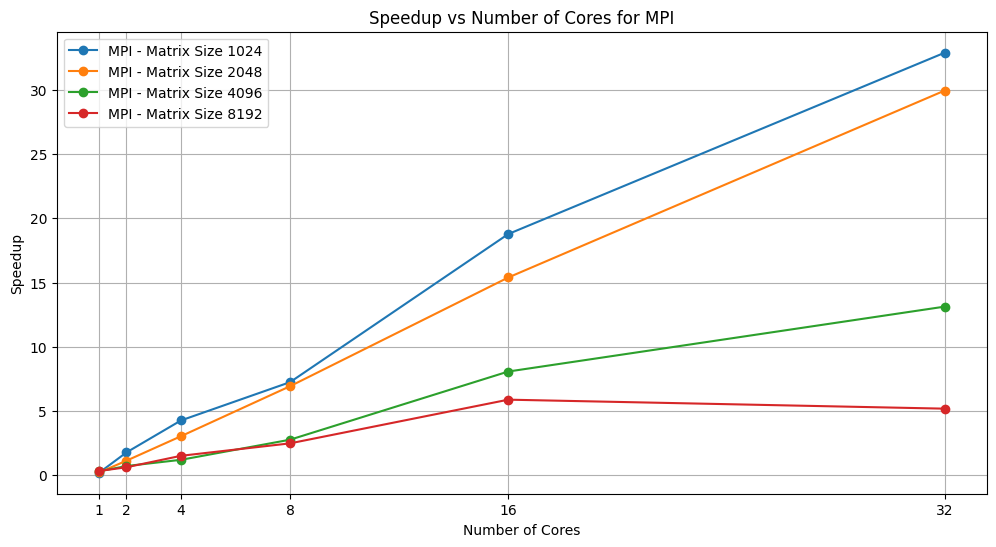

In [188]:
# speedup for mpi
mpi_times = extracted_data_df_mpi.groupby('Matrix Size')['Seconds'].mean()
print(mpi_times)
# Calculate speedup for MPI
extracted_data_df_mpi['Speedup'] = extracted_data_df_mpi.apply(
    lambda row: mpi_times[row['Matrix Size']] / row['Seconds'] if row['Matrix Size'] in mpi_times else None,
    axis=1
)
# Plot speedup for MPI
plt.figure(figsize=(12, 6))
for matrix_size in extracted_data_df_mpi['Matrix Size'].unique():
    matrix_subset = extracted_data_df_mpi[extracted_data_df_mpi['Matrix Size'] == matrix_size]
    plt.plot(
        matrix_subset['Core Number'],
        matrix_subset['Speedup'],
        marker='o',
        label=f'MPI - Matrix Size {matrix_size}'
    )

# x axis should be {2, 4, 8, 16, 32}
plt.xticks([1, 2, 4, 8, 16, 32])
plt.xlabel('Number of Cores', )
plt.ylabel('Speedup')
plt.title('Speedup vs Number of Cores for MPI')
plt.legend()
plt.grid()
plt.show()


MPI DataFrame with Speedup:
    Matrix Size  Core Number     Seconds     Speedup
11         1024            1    3.245984    1.000000
8          1024            2    0.366013    8.868494
10         1024            4    0.152596   21.271750
6          1024            8    0.089881   36.114240
9          1024           16    0.034705   93.530730
7          1024           32    0.019814  163.822752
15         2048            1   22.660982    1.000000
13         2048            2    4.385251    5.167545
17         2048            4    1.637735   13.836782
12         2048            8    0.718649   31.532754
14         2048           16    0.323687   70.008935
16         2048           32    0.166432  136.157602
4          4096            1   92.200823    1.000000
3          4096            2   39.642992    2.325779
2          4096            4   23.721304    3.886836
0          4096            8   10.321623    8.932783
5          4096           16    3.542089   26.030070
1          4096   

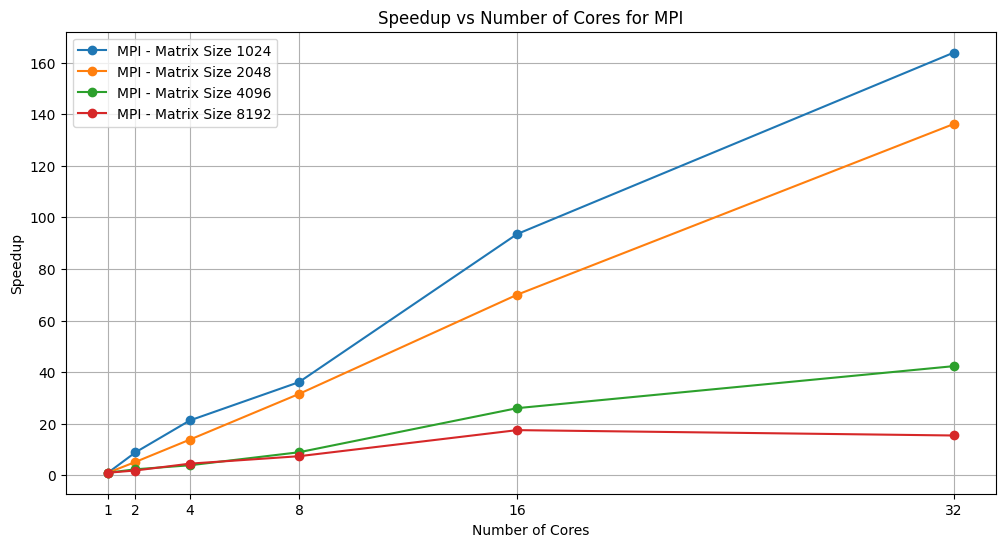

In [189]:
# Extract serial execution times (Core Number = 1) for each matrix size
serial_times = extracted_data_df_mpi[extracted_data_df_mpi['Core Number'] == 1].set_index('Matrix Size')['Seconds']

# Calculate speedup for MPI
extracted_data_df_mpi['Speedup'] = extracted_data_df_mpi.apply(
    lambda row: serial_times[row['Matrix Size']] / row['Seconds'] if row['Matrix Size'] in serial_times else None,
    axis=1
)

# Display the DataFrame with the calculated Speedup
print("MPI DataFrame with Speedup:")
print(extracted_data_df_mpi[['Matrix Size', 'Core Number', 'Seconds', 'Speedup']])

# Plot speedup for MPI
plt.figure(figsize=(12, 6))
for matrix_size in extracted_data_df_mpi['Matrix Size'].unique():
    matrix_subset = extracted_data_df_mpi[extracted_data_df_mpi['Matrix Size'] == matrix_size]
    plt.plot(
        matrix_subset['Core Number'],
        matrix_subset['Speedup'],
        marker='o',
        label=f'MPI - Matrix Size {matrix_size}'
    )

# x axis should be {2, 4, 8, 16, 32}
plt.xticks([1, 2, 4, 8, 16, 32])
plt.xlabel('Number of Cores', )
plt.ylabel('Speedup')
plt.title('Speedup vs Number of Cores for MPI')
plt.legend()
plt.grid()
plt.show()



MPI DataFrame with Speedup:
    Matrix Size  Core Number     Seconds     Speedup
11         1024            1    3.245984    1.000000
8          1024            2    0.366013    8.868494
10         1024            4    0.152596   21.271750
6          1024            8    0.089881   36.114240
9          1024           16    0.034705   93.530730
7          1024           32    0.019814  163.822752
15         2048            1   22.660982    1.000000
13         2048            2    4.385251    5.167545
17         2048            4    1.637735   13.836782
12         2048            8    0.718649   31.532754
14         2048           16    0.323687   70.008935
16         2048           32    0.166432  136.157602
4          4096            1   92.200823    1.000000
3          4096            2   39.642992    2.325779
2          4096            4   23.721304    3.886836
0          4096            8   10.321623    8.932783
5          4096           16    3.542089   26.030070
1          4096   

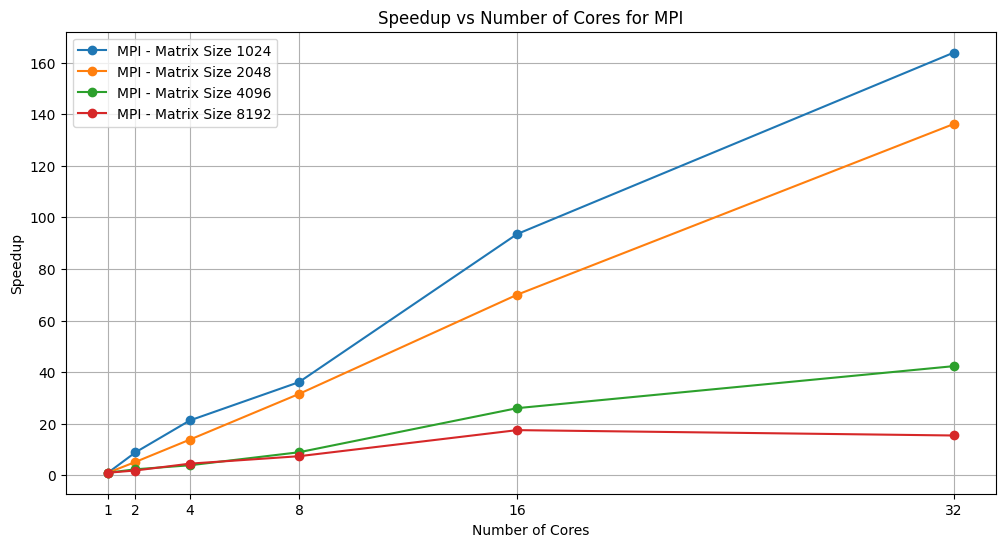

OpenMPI DataFrame with Speedup:
    Matrix Size  Core Number     Seconds   Speedup
17         1024            1    0.727298  1.000000
15         1024            2    0.679617  1.070159
16         1024            4    0.706506  1.029429
13         1024            8    0.723567  1.005156
14         1024           16    0.669052  1.087058
18         1024           32    0.680650  1.068534
21         2048            1    8.424309  1.000000
23         2048            2    7.269258  1.158895
20         2048            4    7.667556  1.098695
22         2048            8    7.230903  1.165042
24         2048           16    7.667948  1.098639
25         2048           32    7.269895  1.158794
9          4096            1   73.122272  1.000000
10         4096            2   62.157050  1.176412
8          4096            4   72.405458  1.009900
7          4096            8   73.137709  0.999789
11         4096           16   62.675798  1.166675
12         4096           32   59.649877  1.225858

<Figure size 640x480 with 0 Axes>

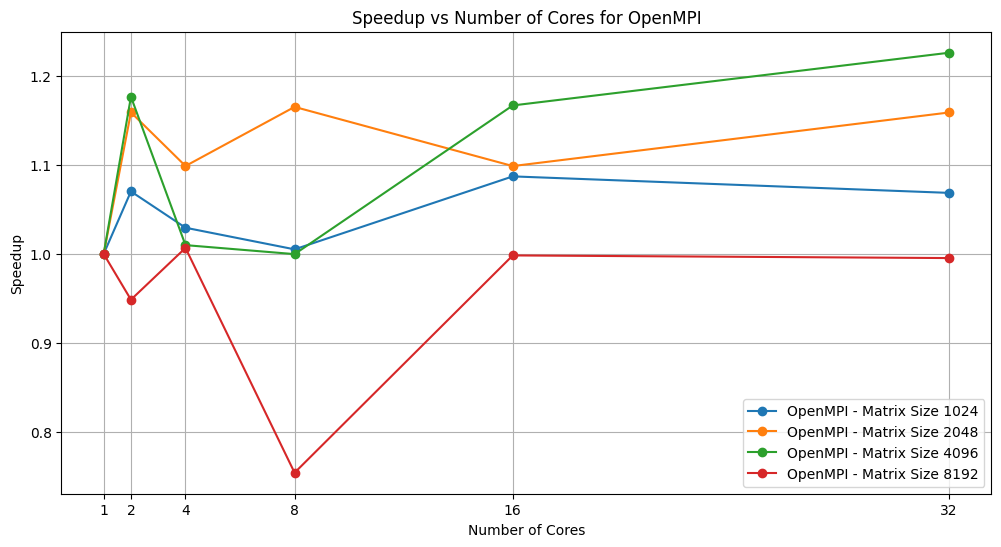

Hybrid DataFrame with Speedup:
    Matrix Size  Core Number     Seconds   Speedup
14         1024            1    3.426192  1.000000
13         1024            2    3.426765  0.999833
11         1024            8    4.634656  0.739255
12         1024           16    3.367672  1.017377
15         1024           32    4.797157  0.714213
17         2048            1   92.780655  1.000000
19         2048            2   92.763450  1.000185
16         2048            4   64.907408  1.429431
18         2048            8   88.101465  1.053111
20         2048           16   88.259831  1.051222
7          4096            1   39.215980  1.000000
8          4096            2   39.359321  0.996358
6          4096            4   39.349758  0.996600
5          4096            8   39.460776  0.993796
9          4096           16   70.567498  0.555723
10         4096           32   73.232770  0.535498
3          8192            1  318.768534  1.000000
4          8192            2  379.584249  0.839783


<Figure size 640x480 with 0 Axes>

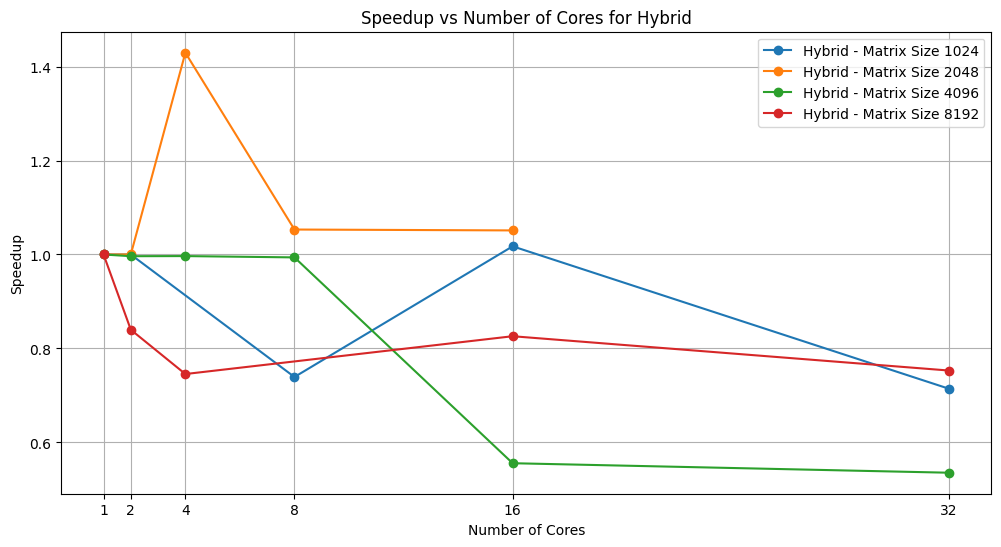

<Figure size 640x480 with 0 Axes>

In [190]:
# prompt: # Extract serial execution times (Core Number = 1) for each matrix size
# serial_times_openmpi = extracted_data_df_openmpi[extracted_data_df_openmpi['Core Number'] == 1].set_index('Matrix Size')['Seconds']
# # Calculate speedup for OpenMPI
# extracted_data_df_openmpi['Speedup'] = extracted_data_df_openmpi.apply(
#     lambda row: serial_times_openmpi[row['Matrix Size']] / row['Seconds'] if row['Matrix Size'] in serial_times_openmpi else None,
#     axis=1
# )
# # Display the DataFrame with the calculated Speedup
# print("OpenMPI DataFrame with Speedup:")
# print(extracted_data_df_openmpi[['Matrix Size', 'Core Number', 'Seconds', 'Speedup']])
# # Plot speedup for OpenMPI
# plt.figure(figsize=(12, 6))
# for matrix_size in extracted_data_df_openmpi['Matrix Size'].unique():
#     matrix_subset = extracted_data_df_openmpi[extracted_data_df_openmpi['Matrix Size'] == matrix_size]
#     plt.plot(
#         matrix_subset['Core Number'],
#         matrix_subset['Speedup'],
#         marker='o',
#         label=f'OpenMPI - Matrix Size {matrix_size}'
#     )
# # Customize the plot
# plt.xticks([1, 2, 4, 8, 16, 32])  # Adjust x-axis ticks
# plt.xlabel('Number of Cores')
# plt.ylabel('Speedup')
# plt.title('Speedup vs Number of Cores for OpenMPI')
# plt.legend()
# plt.grid()
# plt.show()
# make a function

def plot_speedup(df, title_suffix):
    """
    Calculates speedup and plots Speedup vs Number of Cores.

    Args:
        df (pd.DataFrame): DataFrame containing 'Matrix Size', 'Core Number', and 'Seconds'.
        title_suffix (str): Suffix to add to the plot title.
    """
    # Extract serial execution times (Core Number = 1) for each matrix size
    serial_times = df[df['Core Number'] == 1].set_index('Matrix Size')['Seconds']

    # Calculate speedup
    df['Speedup'] = df.apply(
        lambda row: serial_times[row['Matrix Size']] / row['Seconds'] if row['Matrix Size'] in serial_times else None,
        axis=1
    )

    # Display the DataFrame with the calculated Speedup
    print(f"{title_suffix} DataFrame with Speedup:")
    print(df[['Matrix Size', 'Core Number', 'Seconds', 'Speedup']])

    # Plot speedup
    plt.figure(figsize=(12, 6))
    for matrix_size in df['Matrix Size'].unique():
        matrix_subset = df[df['Matrix Size'] == matrix_size]
        plt.plot(
            matrix_subset['Core Number'],
            matrix_subset['Speedup'],
            marker='o',
            label=f'{title_suffix} - Matrix Size {matrix_size}'
        )

    # Customize the plot
    plt.xticks([1, 2, 4, 8, 16, 32])  # Adjust x-axis ticks
    plt.xlabel('Number of Cores')
    plt.ylabel('Speedup')
    plt.title(f'Speedup vs Number of Cores for {title_suffix}')
    plt.legend()
    plt.grid()
    plt.show()
    #save the file to "visual" folder


    plt.savefig(f'speedup_{title_suffix}.png')

# Example usage of the function with your DataFrames:
plot_speedup(extracted_data_df_mpi.copy(), "MPI")
plot_speedup(extracted_data_df_openmpi.copy(), "OpenMPI")
plot_speedup(extracted_data_df_hybrid.copy(), "Hybrid")


OpenMPI DataFrame with Speedup:
    Matrix Size  Core Number     Seconds   Speedup
17         1024            1    0.727298  1.000000
15         1024            2    0.679617  1.070159
16         1024            4    0.706506  1.029429
13         1024            8    0.723567  1.005156
14         1024           16    0.669052  1.087058
18         1024           32    0.680650  1.068534
21         2048            1    8.424309  1.000000
23         2048            2    7.269258  1.158895
20         2048            4    7.667556  1.098695
22         2048            8    7.230903  1.165042
24         2048           16    7.667948  1.098639
25         2048           32    7.269895  1.158794
9          4096            1   73.122272  1.000000
10         4096            2   62.157050  1.176412
8          4096            4   72.405458  1.009900
7          4096            8   73.137709  0.999789
11         4096           16   62.675798  1.166675
12         4096           32   59.649877  1.225858

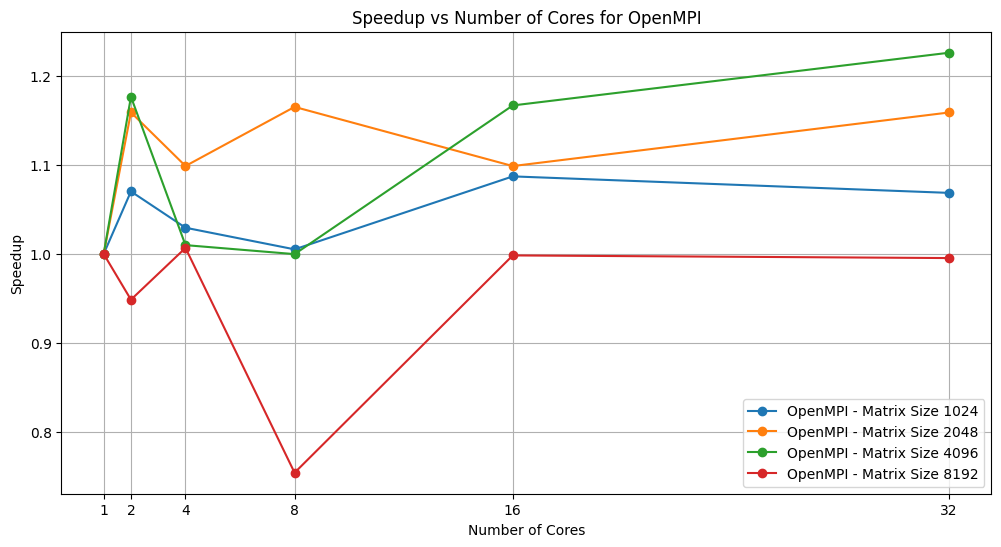

In [191]:

# Extract serial execution times (Core Number = 1) for each matrix size
serial_times_openmpi = extracted_data_df_openmpi[extracted_data_df_openmpi['Core Number'] == 1].set_index('Matrix Size')['Seconds']

# Calculate speedup for OpenMPI
extracted_data_df_openmpi['Speedup'] = extracted_data_df_openmpi.apply(
    lambda row: serial_times_openmpi[row['Matrix Size']] / row['Seconds'] if row['Matrix Size'] in serial_times_openmpi else None,
    axis=1
)

# Display the DataFrame with the calculated Speedup
print("OpenMPI DataFrame with Speedup:")
print(extracted_data_df_openmpi[['Matrix Size', 'Core Number', 'Seconds', 'Speedup']])

# Plot speedup for OpenMPI
plt.figure(figsize=(12, 6))
for matrix_size in extracted_data_df_openmpi['Matrix Size'].unique():
    matrix_subset = extracted_data_df_openmpi[extracted_data_df_openmpi['Matrix Size'] == matrix_size]
    plt.plot(
        matrix_subset['Core Number'],
        matrix_subset['Speedup'],
        marker='o',
        label=f'OpenMPI - Matrix Size {matrix_size}'
    )

# Customize the plot
plt.xticks([1, 2, 4, 8, 16, 32])  # Adjust x-axis ticks
plt.xlabel('Number of Cores')
plt.ylabel('Speedup')
plt.title('Speedup vs Number of Cores for OpenMPI')
plt.legend()
plt.grid()
plt.show()




MPI DataFrame with Efficiency:
    Matrix Size  Core Number     Seconds     Speedup  Efficiency
11         1024            1    3.245984    1.000000    1.000000
8          1024            2    0.366013    8.868494    4.434247
10         1024            4    0.152596   21.271750    5.317938
6          1024            8    0.089881   36.114240    4.514280
9          1024           16    0.034705   93.530730    5.845671
7          1024           32    0.019814  163.822752    5.119461
15         2048            1   22.660982    1.000000    1.000000
13         2048            2    4.385251    5.167545    2.583773
17         2048            4    1.637735   13.836782    3.459195
12         2048            8    0.718649   31.532754    3.941594
14         2048           16    0.323687   70.008935    4.375558
16         2048           32    0.166432  136.157602    4.254925
4          4096            1   92.200823    1.000000    1.000000
3          4096            2   39.642992    2.325779    1.1

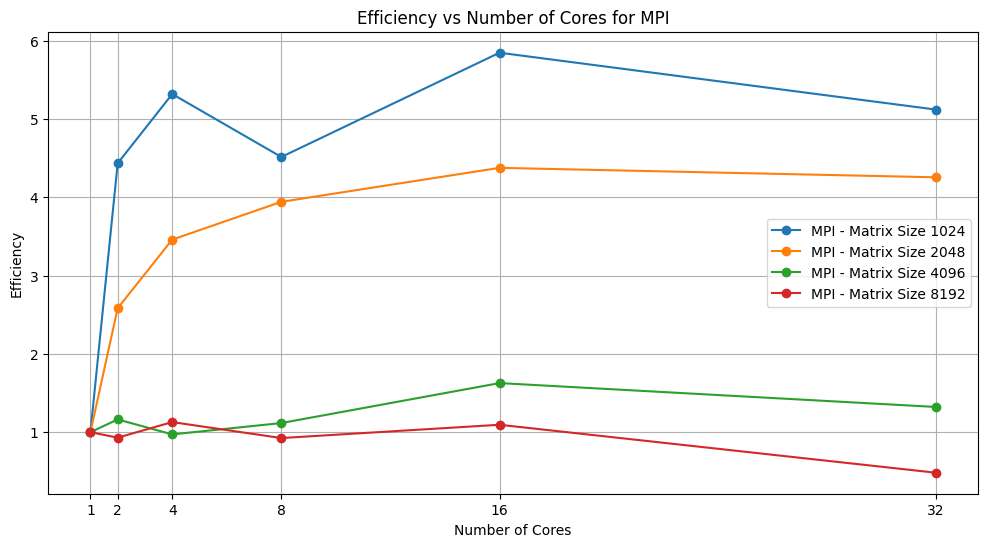

OpenMPI DataFrame with Efficiency:
    Matrix Size  Core Number     Seconds   Speedup  Efficiency
17         1024            1    0.727298  1.000000    1.000000
15         1024            2    0.679617  1.070159    0.535079
16         1024            4    0.706506  1.029429    0.257357
13         1024            8    0.723567  1.005156    0.125645
14         1024           16    0.669052  1.087058    0.067941
18         1024           32    0.680650  1.068534    0.033392
21         2048            1    8.424309  1.000000    1.000000
23         2048            2    7.269258  1.158895    0.579448
20         2048            4    7.667556  1.098695    0.274674
22         2048            8    7.230903  1.165042    0.145630
24         2048           16    7.667948  1.098639    0.068665
25         2048           32    7.269895  1.158794    0.036212
9          4096            1   73.122272  1.000000    1.000000
10         4096            2   62.157050  1.176412    0.588206
8          4096     

<Figure size 640x480 with 0 Axes>

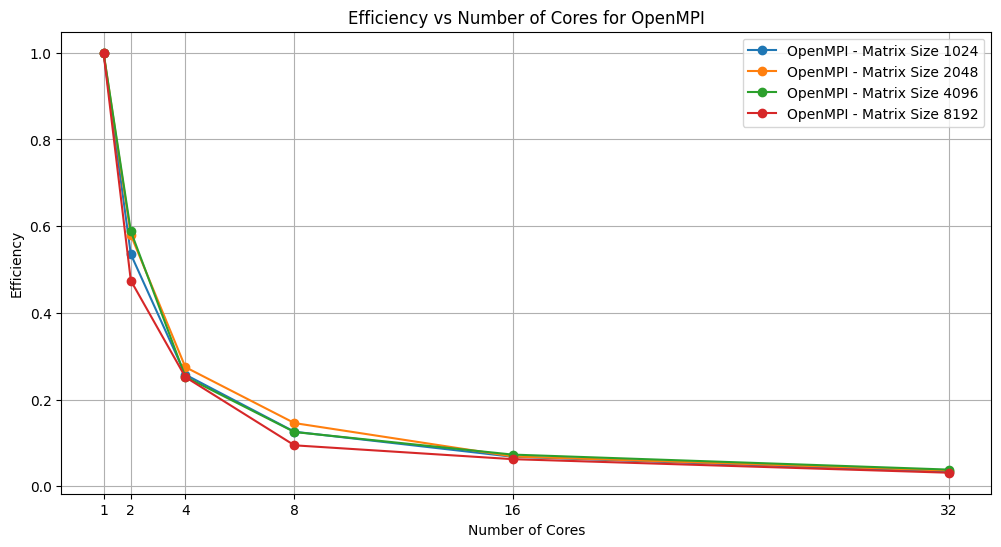

Hybrid DataFrame with Efficiency:
    Matrix Size  Core Number     Seconds   Speedup  Efficiency
14         1024            1    3.426192  0.131297    0.131297
13         1024            2    3.426765  0.131275    0.065638
11         1024            8    4.634656  0.097062    0.012133
12         1024           16    3.367672  0.133579    0.008349
15         1024           32    4.797157  0.093774    0.002930
17         2048            1   92.780655  0.053612    0.053612
19         2048            2   92.763450  0.053622    0.026811
16         2048            4   64.907408  0.076634    0.019159
18         2048            8   88.101465  0.056459    0.007057
20         2048           16   88.259831  0.056358    0.003522
7          4096            1   39.215980  1.570802    1.570802
8          4096            2   39.359321  1.565082    0.782541
6          4096            4   39.349758  1.565462    0.391366
5          4096            8   39.460776  1.561058    0.195132
9          4096      

<Figure size 640x480 with 0 Axes>

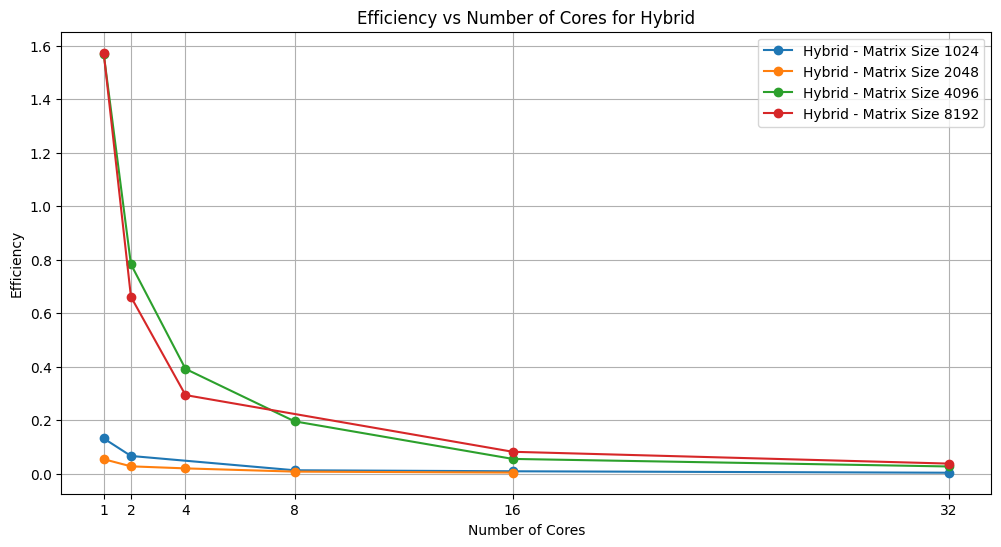

<Figure size 640x480 with 0 Axes>

In [192]:
import matplotlib.pyplot as plt

def plot_efficiency(df, title_suffix, serial_df):
    """
    Calculates efficiency and plots Efficiency vs Number of Cores.

    Args:
        df (pd.DataFrame): DataFrame containing 'Matrix Size', 'Core Number', and 'Seconds'.
        title_suffix (str): Suffix to add to the plot title.
        serial_df (pd.DataFrame): DataFrame containing serial execution times.
    """
    # Extract serial execution times (Core Number = 1) for each matrix size
    serial_times = serial_df[serial_df['Core Number'] == 1].set_index('Matrix Size')['Seconds']

    # Calculate speedup if not already present
    if 'Speedup' not in df.columns or df['Speedup'].isnull().all():
        df['Speedup'] = df.apply(
            lambda row: serial_times[row['Matrix Size']] / row['Seconds'] if row['Matrix Size'] in serial_times else None,
            axis=1
        )

    # Calculate efficiency
    df['Efficiency'] = df['Speedup'] / df['Core Number']

    # Display the DataFrame with the calculated Efficiency
    print(f"{title_suffix} DataFrame with Efficiency:")
    print(df[['Matrix Size', 'Core Number', 'Seconds', 'Speedup', 'Efficiency']])

    # Plot efficiency
    plt.figure(figsize=(12, 6))
    for matrix_size in df['Matrix Size'].unique():
        matrix_subset = df[df['Matrix Size'] == matrix_size]
        plt.plot(
            matrix_subset['Core Number'],
            matrix_subset['Efficiency'],
            marker='o',
            label=f'{title_suffix} - Matrix Size {matrix_size}'
        )

    # Customize the plot
    plt.xticks([1, 2, 4, 8, 16, 32])  # Adjust x-axis ticks
    plt.xlabel('Number of Cores')
    plt.ylabel('Efficiency')
    plt.title(f'Efficiency vs Number of Cores for {title_suffix}')
    plt.legend()
    plt.grid()
    plt.show()
    #save the file to "visual" folder


    plt.savefig(f'efficiency_{title_suffix}.png')

# Example usage of the function with your DataFrames:
plot_efficiency(extracted_data_df_mpi.copy(), "MPI", extracted_data_df_serial.copy())
plot_efficiency(extracted_data_df_openmpi.copy(), "OpenMPI", extracted_data_df_serial.copy())
plot_efficiency(extracted_data_df_hybrid.copy(), "Hybrid", extracted_data_df_serial.copy())